In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hydroeval import evaluator, nse, kge, pbias
from tqdm import tqdm
import datetime as dt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [74]:
df = pd.read_csv("../data/pnwNP_modelStats_NewEps.csv")
df = df[["gage", "model",'kge','kge_r','kge_a','kge_b']]
df

,gage,model,kge,kge_r,kge_a,kge_b
0,10361700,vic,NaN,NaN,NaN,NaN
1,10361700,prms,NaN,NaN,NaN,NaN
2,10361700,nwm0,NaN,NaN,NaN,NaN
3,10361700,nwm1,NaN,NaN,NaN,NaN
4,10366000,vic,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2013,480608115242901,prms,NaN,NaN,NaN,NaN
2014,480608115242901,nwm0,-486.912465,0.244170,487.403599,39.334601
2015,480608115242901,nwm1,-0.537044,0.380703,0.001757,0.008795
2016,480608115242901,nwm0,-486.912465,0.244170,487.403599,39.334601


In [99]:
tt = df
tt = tt.melt(id_vars=["gage", "model"], var_name="metric", value_name="value")
tt['value']=tt['value'].astype(float)

tt = tt.replace([np.inf, -np.inf], np.nan)
tt = tt.dropna()
# tt = tt[~tt.isin([np.nan, np.inf, -np.inf])]
tmp=tt.reset_index(drop=True)
tmp

,gage,model,metric,value
0,10366000,nwm1,kge,0.206205
1,10378500,vic,kge,-0.537695
2,10378500,prms,kge,-0.455593
3,10378500,nwm1,kge,-0.649372
4,10389500,nwm1,kge,-0.757923
...,...,...,...,...
3837,480608115242901,nwm1,kge_b,0.008795
3838,480608115242901,nwm0,kge_b,39.334601
3839,480608115242901,nwm1,kge_b,0.008795
3840,480608115242901,nwm0,kge_b,39.334601


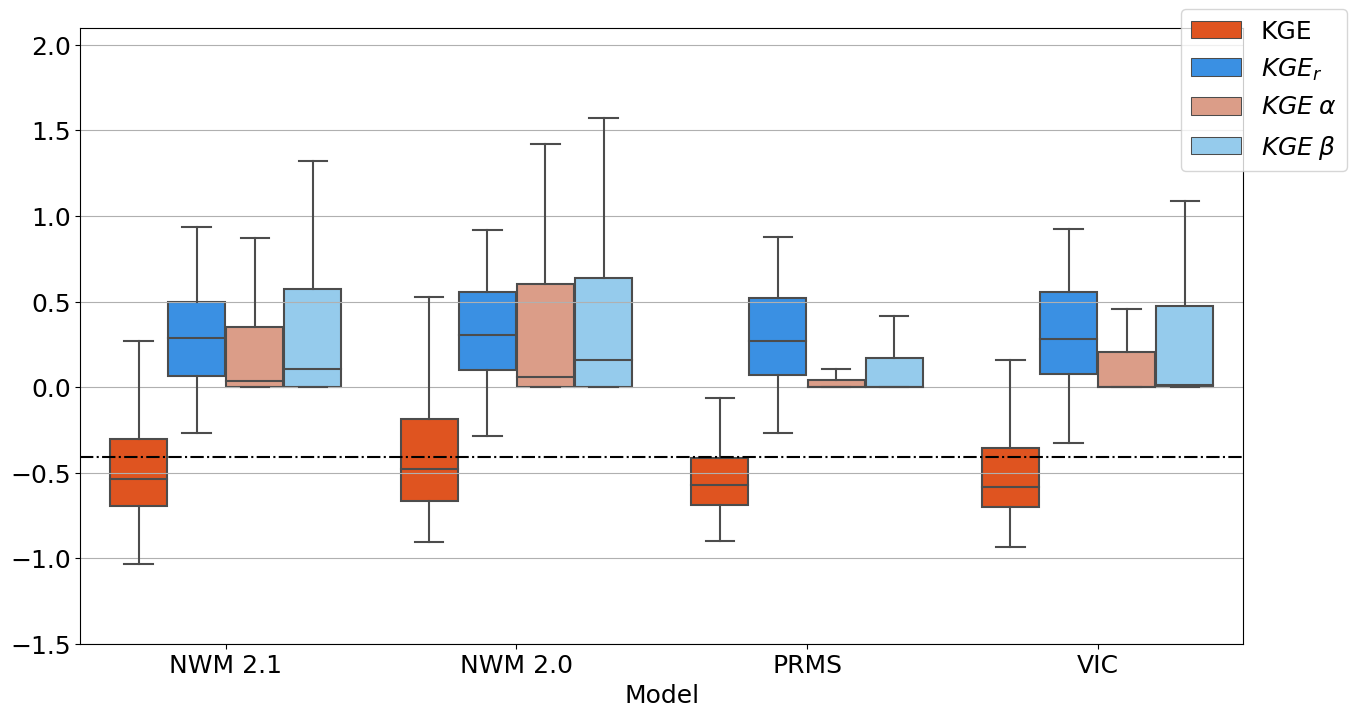

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(15,8))
# ax = sns.boxplot(data=tmp, x="model", y="value",hue = "metric",palette = ["darksalmon", "dodgerblue"])
ax = sns.boxplot(data=tmp, x="model", y="value",hue = "metric",showfliers=False,palette = ["orangered", "dodgerblue","darksalmon","lightskyblue"],order = ["nwm1","nwm0","prms","vic"])
# ax = sns.boxplot(data=tmp, x="model", y="value",hue = "metric",showfliers=False,palette = ["orangered", "dodgerblue","darksalmon","lightskyblue"])
ax.set_ylim([-1.5,2.1])
ax.set_xticklabels(["NWM 2.1","NWM 2.0","PRMS","VIC"])
ax.set(ylabel=None)
ax.set(xlabel="Model")
ax.grid('on', which='major', axis='y')
ax.axhline(y=-0.41, color='black', linestyle='-.')
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=["KGE",r'$KGE_r$',r'$KGE_ \alpha$',r'$KGE_ \beta$'],bbox_to_anchor=(1.1, 1.05))
plt.savefig("../docs/KGE_decomp_boxplot.pdf")

In [16]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import matplotlib.colors as pltc
import geopandas
# import mapclassify
mpl.rcParams['pdf.fonttype'] = 42

In [41]:
df = pd.read_csv("../data/pnwNP_StatsLocations.csv")
df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.dec_long_va,df.dec_lat_va)).set_crs('epsg:4269')

In [18]:
pnw_hydro = geopandas.read_file("../data/mapping/pnw_hydrologic_landscape_class/PNW Hydrologic Landscape Class.shp")
pnw_hydro_repro = pnw_hydro.to_crs(epsg=4269)
pnw_hydro_repro.CLASS = pnw_hydro['CLASS'].astype(str).str[0:1]

states = geopandas.read_file("../data/mapping/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
states = states.to_crs(epsg=4269)
st = ["Idaho",'Washington','Oregon']
states = states[states["NAME"].isin(st)]

rivs = geopandas.read_file("../data/mapping/rs16my07/")
rivs = rivs.set_crs(epsg=4269)
rivs = geopandas.clip(rivs, states)
rivs = rivs[rivs["STRAHLER"]>=4]

df = geopandas.clip(df, states)

In [52]:
tmp = df[["site_no","dec_lat_va","dec_long_va","geometry"]]
mapKGE = pd.merge(tt,tmp,left_on="gage",right_on="site_no").reset_index(drop=True)

mapKGE = geopandas.GeoDataFrame(mapKGE, geometry=geopandas.points_from_xy(mapKGE.dec_long_va,mapKGE.dec_lat_va)).set_crs('epsg:4269')

In [43]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import matplotlib.colors as pltc
import geopandas
import mapclassify
mpl.rcParams['pdf.fonttype'] = 42

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mapclassify/classifiers.py:939: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mapclassify/classifiers.py:969: RuntimeWarning: invalid value encountered in scalar divide
  gadf = 1 if adam == 0 else 1 - self.adcm / adam


Text(0.5, 1.0, 'Proportion of Zero Flow Readings')

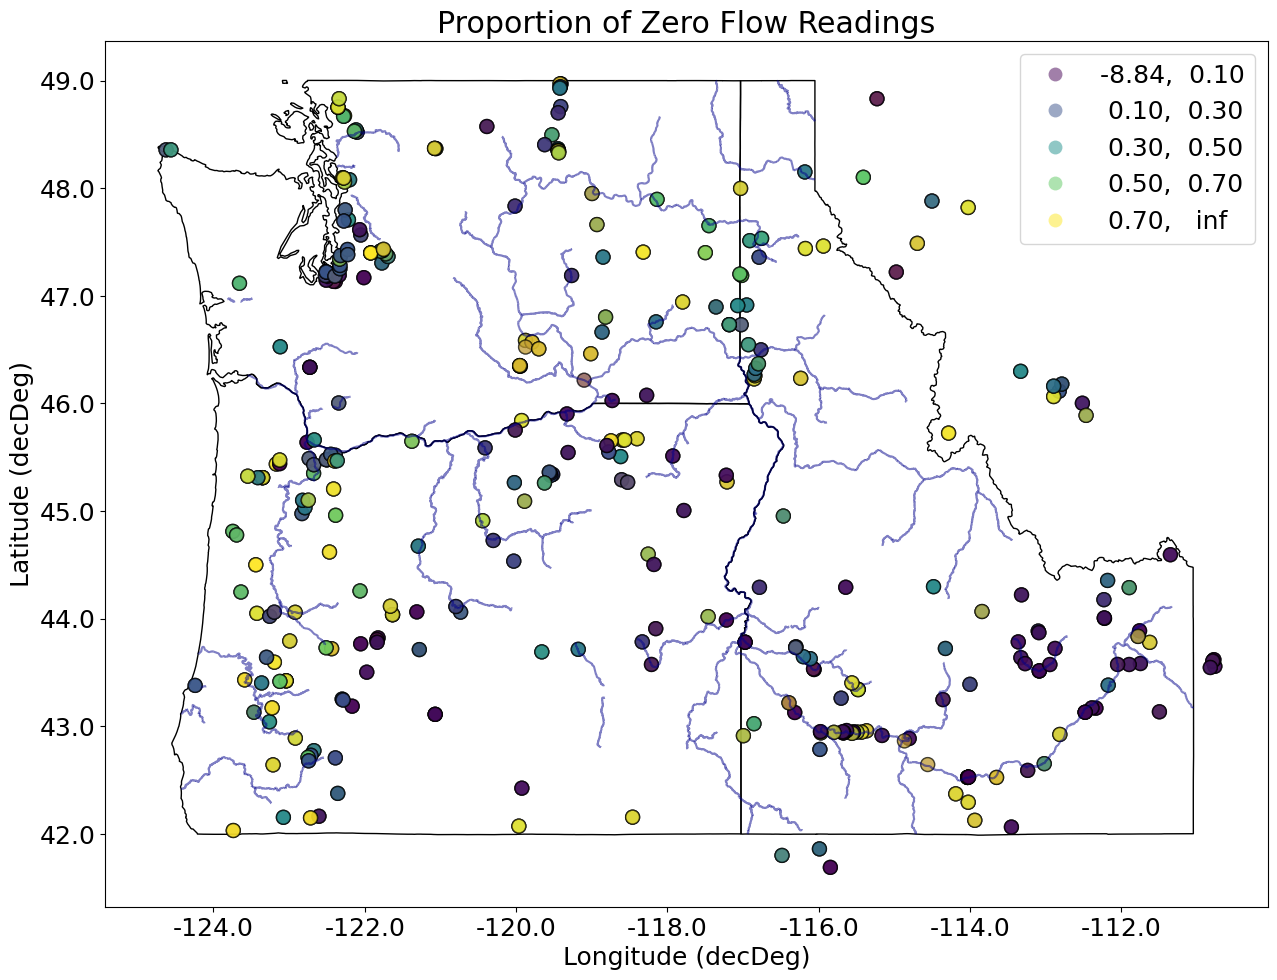

In [64]:
plt.rcParams.update({'font.size': 18})


color_map = {'W': 'lightskyblue',
          'V': 'dodgerblue' ,
          'D': 'navajowhite',
          'M': 'papayawhip',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

f,ax = plt.subplots(figsize=(15, 15))

# pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(color_map),alpha= .5)
states.plot(ax=ax,facecolor="none",edgecolor = "black")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')
ss= mapKGE[mapKGE["model"]=="nwm1"]
# tmp = df[df["propZero"]>0]
ss.plot(ax=ax,
        markersize=100,
        alpha = .5,
        edgecolor = "black",
        legend=True,
        # scheme="EqualInterval",
        scheme="user_defined", 
        classification_kwds={'bins':[.1,.3, .5, .7]},
        cmap="viridis", 
        column='value')
                
# ax.arrow(-112, 48, 0, 0.75, length_includes_head=True,
#           head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
# ax.text(x=-112.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Proportion of Zero Flow Readings')
# plt.colorbar(tmp, ax=ax)

# cx.add_basemap(ax ,reset_extent= False,zoom=9,source=cx.providers.OpenStreetMap.Mapnik)

# f.savefig('../docs/AllGagesMap_PropZero.png',dpi=600)
# f.savefig('../docs/AllGagesMap_PropZero.pdf')

In [59]:
mapKGE[mapKGE["model"]=="nwm0"]


,gage,model,metric,value,site_no,dec_lat_va,dec_long_va,geometry
2,10361700,nwm0,kge,NaN,10361700,41.722116,-119.373258,POINT (-119.37326 41.72212)
6,10361700,nwm0,kge_r,NaN,10361700,41.722116,-119.373258,POINT (-119.37326 41.72212)
10,10361700,nwm0,kge_a,NaN,10361700,41.722116,-119.373258,POINT (-119.37326 41.72212)
14,10361700,nwm0,kge_b,NaN,10361700,41.722116,-119.373258,POINT (-119.37326 41.72212)
18,10366000,nwm0,kge,NaN,10366000,42.072111,-119.962725,POINT (-119.96272 42.07211)
...,...,...,...,...,...,...,...,...
8030,452807122215001,nwm0,kge_b,0.690418,452807122215001,45.468667,-122.363972,POINT (-122.36397 45.46867)
8034,480608115242901,nwm0,kge,0.248167,480608115242901,48.102226,-115.408919,POINT (-115.40892 48.10223)
8038,480608115242901,nwm0,kge_r,0.576029,480608115242901,48.102226,-115.408919,POINT (-115.40892 48.10223)
8042,480608115242901,nwm0,kge_a,1.520382,480608115242901,48.102226,-115.408919,POINT (-115.40892 48.10223)


In [53]:
mapKGE

,gage,model,metric,value,site_no,dec_lat_va,dec_long_va,geometry
0,10361700,vic,kge,NaN,10361700,41.722116,-119.373258,POINT (-119.37326 41.72212)
1,10361700,prms,kge,NaN,10361700,41.722116,-119.373258,POINT (-119.37326 41.72212)
2,10361700,nwm0,kge,NaN,10361700,41.722116,-119.373258,POINT (-119.37326 41.72212)
3,10361700,nwm1,kge,NaN,10361700,41.722116,-119.373258,POINT (-119.37326 41.72212)
4,10361700,vic,kge_r,NaN,10361700,41.722116,-119.373258,POINT (-119.37326 41.72212)
...,...,...,...,...,...,...,...,...
8043,480608115242901,nwm1,kge_a,0.654666,480608115242901,48.102226,-115.408919,POINT (-115.40892 48.10223)
8044,480608115242901,vic,kge_b,NaN,480608115242901,48.102226,-115.408919,POINT (-115.40892 48.10223)
8045,480608115242901,prms,kge_b,NaN,480608115242901,48.102226,-115.408919,POINT (-115.40892 48.10223)
8046,480608115242901,nwm0,kge_b,0.661320,480608115242901,48.102226,-115.408919,POINT (-115.40892 48.10223)
